<a href="https://colab.research.google.com/github/sebastianPsm/orc/blob/master/sample_data/rowing_data_MASS_Algorithm_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mass_ts

In [2]:
import datetime
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import mass_ts as mts # https://www.cs.unm.edu/~mueen/FastestSimilaritySearch.html

/usr/local/lib/python3.6/dist-packages/mass_ts/_mass_ts.py:18: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  'GPU support will not work. You must pip install mass-ts[gpu].')


In [3]:
# Clone orc repo with rowind data
!git clone -l -s git://github.com/sebastianpsm/orc.git cloned-repo
%cd cloned-repo
!ls
%cd ..

Cloning into 'cloned-repo'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 194 (delta 112), reused 95 (delta 40), pack-reused 0
Receiving objects: 100% (194/194), 2.82 MiB | 4.92 MiB/s, done.
Resolving deltas: 100% (112/112), done.
/content/cloned-repo
_config.yml  esp32  LICENSE  parts_list  README.md  sample_data
/content


In [4]:
data = pd.read_csv("cloned-repo/sample_data/20200517.CSV")
fs = 50 # sample freq. [Hz]
rec_data = "17.5.20 7:15"

In [5]:
# Add time column
data["time_delta"] = data["time_delta[ms]"].astype('timedelta64[ms]')
data["t"] = data["time_delta"].cumsum() + datetime.datetime.strptime(rec_data, "%d.%m.%y %H:%M")

In [6]:
# Filter
rolling_window = 25
data["accel_x_filter"] = data["accel_x[G]"].rolling(rolling_window).mean()
data["accel_y_filter"] = data["accel_y[G]"].rolling(rolling_window).mean()
data["accel_z_filter"] = data["accel_z[G]"].rolling(rolling_window).mean()
data["gyro_x_filter"] = data["gyro_x[deg/s]"].rolling(rolling_window).mean()
data["gyro_y_filter"] = data["gyro_x[deg/s]"].rolling(rolling_window).mean()
data["gyro_z_filter"] = data["gyro_x[deg/s]"].rolling(rolling_window).mean()
data = data.dropna()

In [7]:
start=10000
stop=start+5000

plot_data = data[start:stop]
plot_data = plot_data[["t", "accel_x_filter", "accel_y_filter", "accel_z_filter"]]

accel_x_plot = alt.Chart(plot_data).mark_line(color="red").encode(alt.X("t:T", title="seconds"), alt.Y("accel_x_filter", title="acceleration [G]"))
accel_y_plot = alt.Chart(plot_data).mark_line(color="green").encode(alt.X("t:T", title="seconds"), alt.Y("accel_y_filter", title="acceleration [G]"))
accel_z_plot = alt.Chart(plot_data).mark_line(color="blue").encode(alt.X("t:T", title="seconds"), alt.Y("accel_z_filter", title="acceleration [G]"))
(accel_x_plot + accel_y_plot + accel_z_plot).properties(width=800,title="Acceleration [G]").interactive(bind_y=False)

alt.LayerChart(...)

In [8]:
start = 1095
stop = 1245
len  = stop-start
q = np.array(plot_data["accel_z_filter"][start:stop])
ts = np.array(data["accel_z_filter"])
distances = mts.mass2(ts,q)

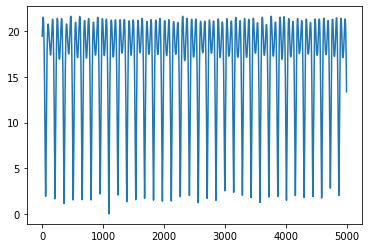

In [9]:
plt.plot(np.abs(distances)[10000:15000])

In [12]:
k = 200
exclusion_zone = 25
top_motifs = mts.top_k_motifs(distances, k, exclusion_zone)

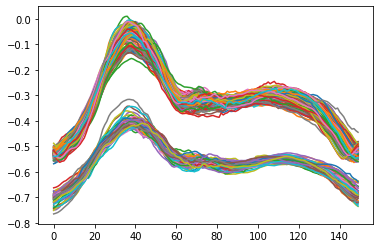

In [13]:
for idx, top_motif in enumerate(top_motifs):
  motiv = data["accel_z_filter"][top_motif:top_motif+len]
  plt.plot(range(0,len), motiv)